# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import arabic_reshaper
from bidi.algorithm import get_display

# Read The Data

In [2]:
dfs = pd.read_excel('Data/All_Stories.xlsx', sheet_name=None)

In [3]:
# show info about each sheet 

for sheet_name, df in dfs.items():
    print(f"Sheet name: {sheet_name}\n")
    print(dfs[f"{sheet_name}"].info())

Sheet name: art-et-calture

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   object
 1   title   1000 non-null   object
 2   date    1000 non-null   object
 3   author  1000 non-null   object
 4   story   1000 non-null   object
 5   topic   1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None
Sheet name: sport

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   object
 1   title   1000 non-null   object
 2   date    1000 non-null   object
 3   author  1000 non-null   object
 4   story   1000 non-null   object
 5   topic   1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None
Sheet name: tamazight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10

# Concatenate The Data

In [4]:
final_df = pd.DataFrame()
for sheet_name, df in dfs.items():
    final_df = pd.concat([final_df , dfs[f"{sheet_name}"]], ignore_index=True)

In [5]:
final_df

,id,title,date,author,story,topic
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...
10995,a74f908a055c11eb8ce2646e69d991ea,"تكريم ""تُحفة مَناقب شرفاء وزان"" في جامعة فرنسية",الثلاثاء 24 دجنبر 2019 - 20:05,هسبريس - مصطفى شاكري,أطروحة جديدة تُعنى بدراسة الأبعاد السيميائية ل...,orbites
10996,a8579f76055c11eb9627646e69d991ea,"إسبانيا تردّ على المغرب بنشر طائرات ""إف 18"" فو...",الثلاثاء 24 دجنبر 2019 - 18:00,هسبريس - عبد السلام الشامخ,تزامناً مع توجّه المغرب لترسيم حدوده في المياه...,orbites
10997,a9362062055c11ebaf97646e69d991ea,"لجنة النموذج التنموي تضع ""ميثاق قواعد الاشتغال""",الثلاثاء 24 دجنبر 2019 - 13:15,هسبريس - و.م.ع,قامت اللجنة الخاصة بالنموذج التنموي، خلال اجتم...,orbites
10998,aa1cef2e055c11eb8ef8646e69d991ea,ضعف القدرات البشرية والبنيات المؤسساتية يبطئ ا...,الثلاثاء 24 دجنبر 2019 - 13:00,هسبريس - يوسف لخضر,اختُتمت، السبت الماضي بمدينة أكادير، أشغال الم...,orbites


# Preprocessing

In [6]:
# convert arabic date string to english date

def convert_arabic_to_english(arabic_date_str):
    mapping = {
        'السبت': 'Saturday', 'الأحد': 'Sunday', 'الاثنين': 'Monday', 'الثلاثاء': 'Tuesday',
        'الأربعاء': 'Wednesday', 'الخميس': 'Thursday', 'الجمعة': 'Friday',
        'يناير': 'January', 'فبراير': 'February', 'مارس': 'March', 'أبريل': 'April',
        'ماي': 'May', 'يونيو': 'June', 'يوليوز': 'July', 'غشت': 'August',
        'شتنبر': 'September', 'أكتوبر': 'October', 'نونبر': 'November', 'دجنبر': 'December'
    }
    
    for key, value in mapping.items():
        arabic_date_str = arabic_date_str.replace(key, value)
    
    return arabic_date_str

final_df["date"] = final_df["date"].apply(convert_arabic_to_english)

In [7]:
final_df

,id,title,date,author,story,topic
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",Friday 02 October 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",Friday 02 October 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",Friday 02 October 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",Friday 02 October 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",Thursday 01 October 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...
10995,a74f908a055c11eb8ce2646e69d991ea,"تكريم ""تُحفة مَناقب شرفاء وزان"" في جامعة فرنسية",Tuesday 24 December 2019 - 20:05,هسبريس - مصطفى شاكري,أطروحة جديدة تُعنى بدراسة الأبعاد السيميائية ل...,orbites
10996,a8579f76055c11eb9627646e69d991ea,"إسبانيا تردّ على المغرب بنشر طائرات ""إف 18"" فو...",Tuesday 24 December 2019 - 18:00,هسبريس - عبد السلام الشامخ,تزامناً مع توجّه المغرب لترسيم حدوده في المياه...,orbites
10997,a9362062055c11ebaf97646e69d991ea,"لجنة النموذج التنموي تضع ""ميثاق قواعد الاشتغال""",Tuesday 24 December 2019 - 13:15,هسبريس - و.م.ع,قامت اللجنة الخاصة بالنموذج التنموي، خلال اجتم...,orbites
10998,aa1cef2e055c11eb8ef8646e69d991ea,ضعف القدرات البشرية والبنيات المؤسساتية يبطئ ا...,Tuesday 24 December 2019 - 13:00,هسبريس - يوسف لخضر,اختُتمت، السبت الماضي بمدينة أكادير، أشغال الم...,orbites


In [8]:
# Convert the 'date' column to datetime format

final_df["date"]  = pd.to_datetime(final_df["date"] )


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      11000 non-null  object        
 1   title   11000 non-null  object        
 2   date    11000 non-null  datetime64[ns]
 3   author  11000 non-null  object        
 4   story   11000 non-null  object        
 5   topic   11000 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 515.8+ KB


# EDA

## Count the number of examples per class

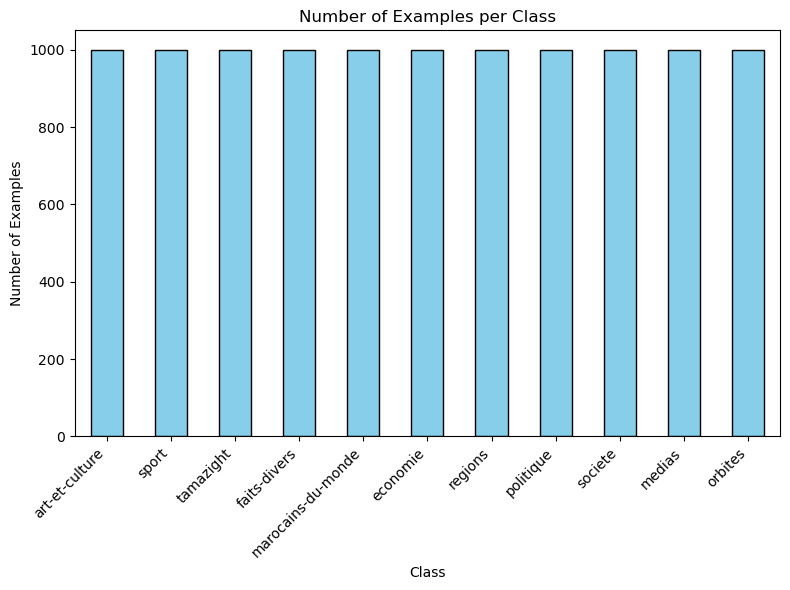

In [10]:
class_counts = final_df['topic'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.title('Number of Examples per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## top frequent 2-grams generally and per class

In [11]:
# extract n-grams and get their frequencies

def get_top_ngrams(text_data, n, n_top):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text_data)
    ngrams_freq = ngrams.sum(axis=0)
    ngrams_freq_sorted = sorted(zip(vectorizer.get_feature_names(), ngrams_freq.tolist()[0]), key=lambda x: x[1], reverse=True)
    return ngrams_freq_sorted[:n_top]

In [12]:
# the value of n for n-grams

n = 2  

# the number of top n-grams

n_top = 5  

### Overall top frequent 2-grams

In [13]:
overall_top_ngrams = get_top_ngrams(final_df['story'], n, n_top)

print(f"Overall top {n}-grams:")
for ngram, freq in overall_top_ngrams:
    print(f"{ngram}: {freq}")


C:\Users\Abdalrhman Morsi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Overall top 2-grams:
من أجل: 5734
إلى أن: 5698
من خلال: 3621
في المائة: 3429
وهو ما: 2913


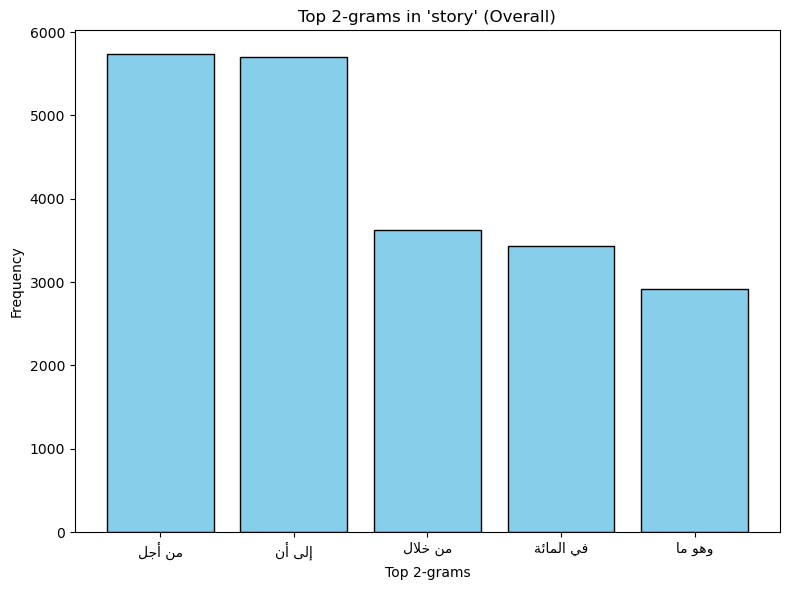

In [14]:
# Visualize the overall top 2-grams

top_ngram_labels, top_ngram_freqs = zip(*overall_top_ngrams)

# Convert Arabic text for right-to-left display

reshaped_labels = [arabic_reshaper.reshape(label) for label in top_ngram_labels]
display_labels = [get_display(label) for label in reshaped_labels]

plt.figure(figsize=(8, 6))
plt.bar(display_labels, top_ngram_freqs, color='skyblue', edgecolor='black')
plt.xlabel(f"Top {n}-grams")
plt.ylabel("Frequency")
plt.title(f"Top {n}-grams in 'story' (Overall)")
plt.tight_layout()
plt.show()

### classes top frequent 2-grams

In [15]:
# get the unique classes 

unique_classes = final_df['topic'].unique()
unique_classes

array(['art-et-culture', 'sport', 'tamazight', 'faits-divers',
       'marocains-du-monde', 'economie', 'regions', 'politique',
       'societe', 'medias', 'orbites'], dtype=object)

In [16]:
n_class_top_ngrams = {}

for topic in unique_classes:
    class_text_data = final_df[final_df['topic'] == topic]['story']
    class_top_ngrams = get_top_ngrams(class_text_data, n, n_top)
    n_class_top_ngrams[topic] = class_top_ngrams
    
print("\nTop frequent n-grams per class:\n")

for topic in n_class_top_ngrams:
    print(f"{topic} - Top {n}-grams:")
    for ngram, freq in n_class_top_ngrams[topic]:
        print(f"{ngram}: {freq}")
    print ("\n")


Top frequent n-grams per class:

art-et-culture - Top 2-grams:
من خلال: 516
إلى أن: 458
من أجل: 362
في هذا: 343
مجموعة من: 288


sport - Top 2-grams:
لكرة القدم: 1038
فيروس كورونا: 372
الدولي المغربي: 317
إلى أن: 316
من العمر: 288


tamazight - Top 2-grams:
اللغة الأمازيغية: 899
الأمازيغية في: 741
من أجل: 720
القانون التنظيمي: 622
للثقافة الأمازيغية: 548


faits-divers - Top 2-grams:
النيابة العامة: 730
العامة المختصة: 554
الحراسة النظرية: 408
المشتبه فيه: 384
من أجل: 351


marocains-du-monde - Top 2-grams:
من أجل: 743
الجالية المغربية: 610
إلى أن: 523
مغاربة العالم: 476
المقيمين بالخارج: 372


economie - Top 2-grams:
في المائة: 2066
إلى أن: 616
مليار درهم: 586
من أجل: 510
فيروس كورونا: 508


regions - Top 2-grams:
كورونا المستجد: 515
بفيروس كورونا: 500
كوفيد 19: 432
الدار البيضاء: 351
حالة بإقليم: 348


politique - Top 2-grams:
إلى أن: 670
من أجل: 495
رئيس الحكومة: 441
مجلس النواب: 410
العدالة والتنمية: 402


societe - Top 2-grams:
إلى أن: 566
وزارة الصحة: 471
من أجل: 467
في المائة: 

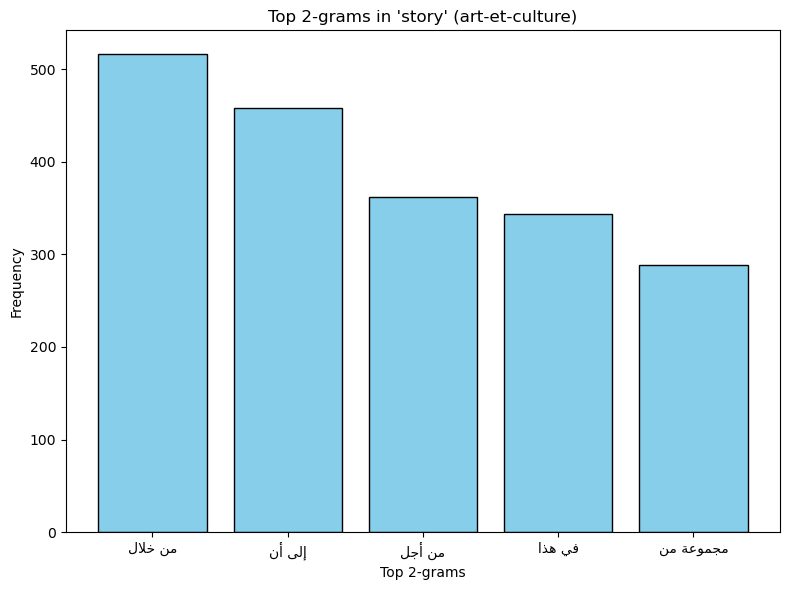

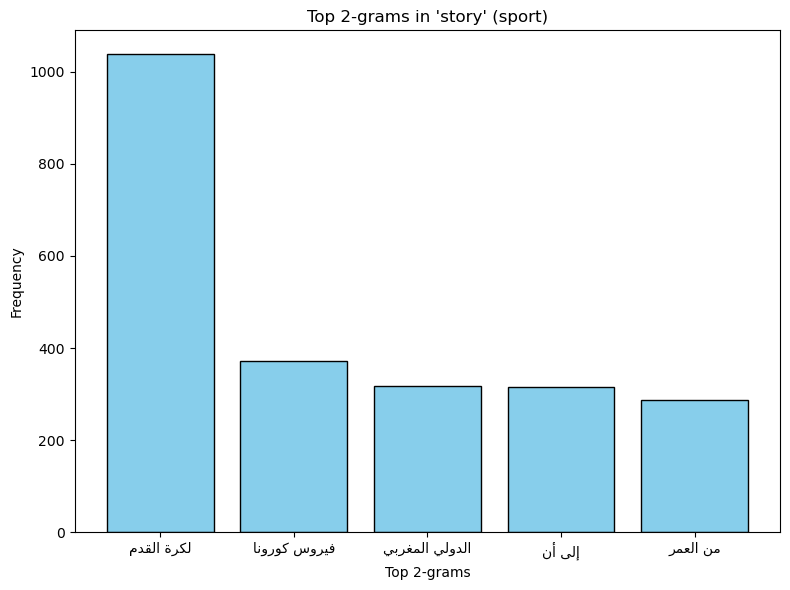

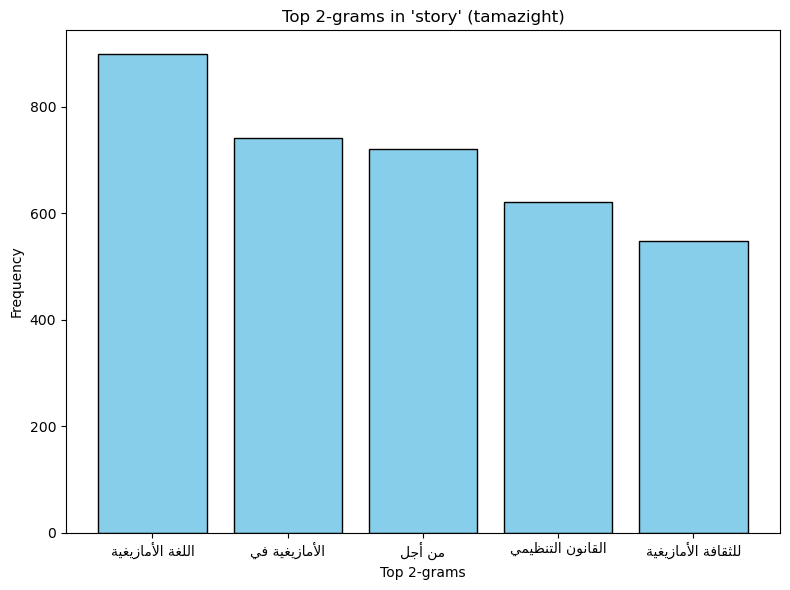

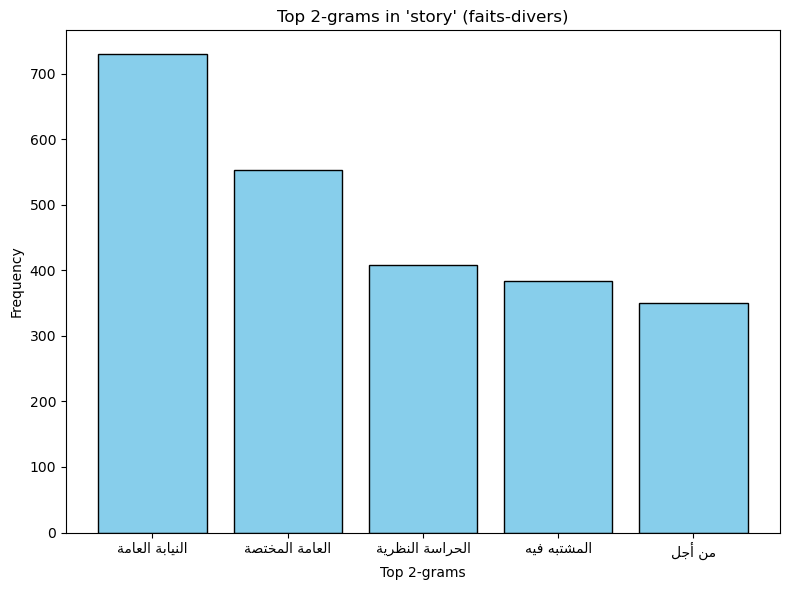

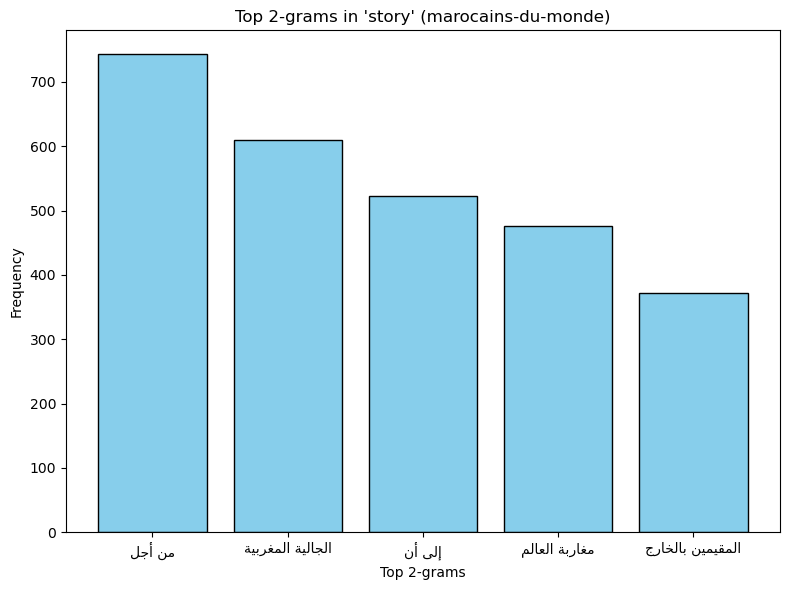

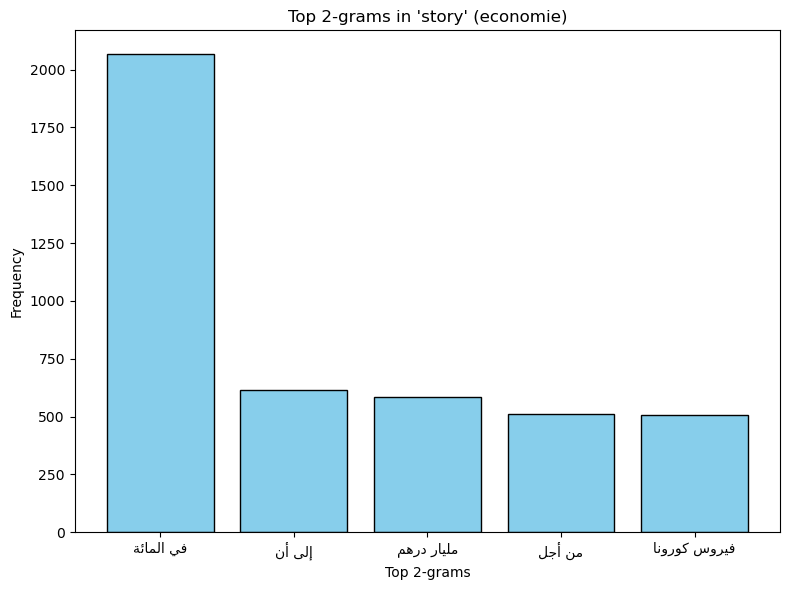

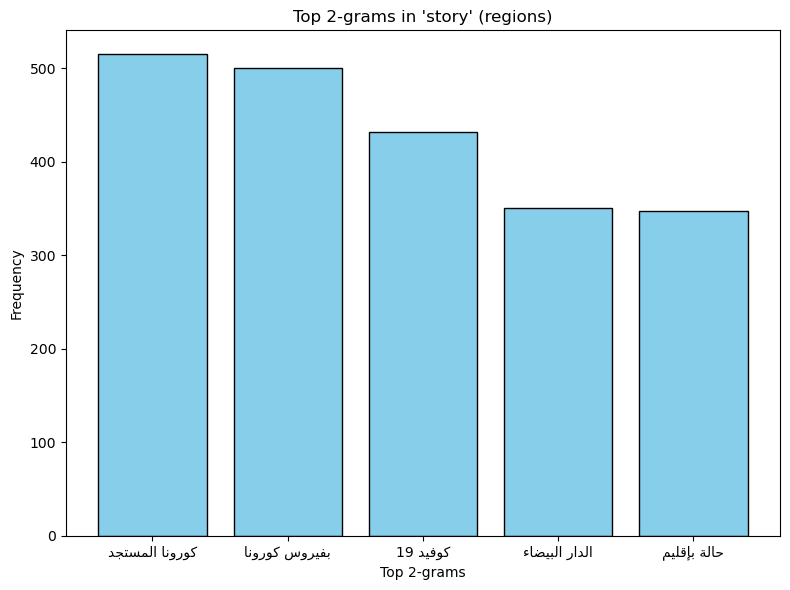

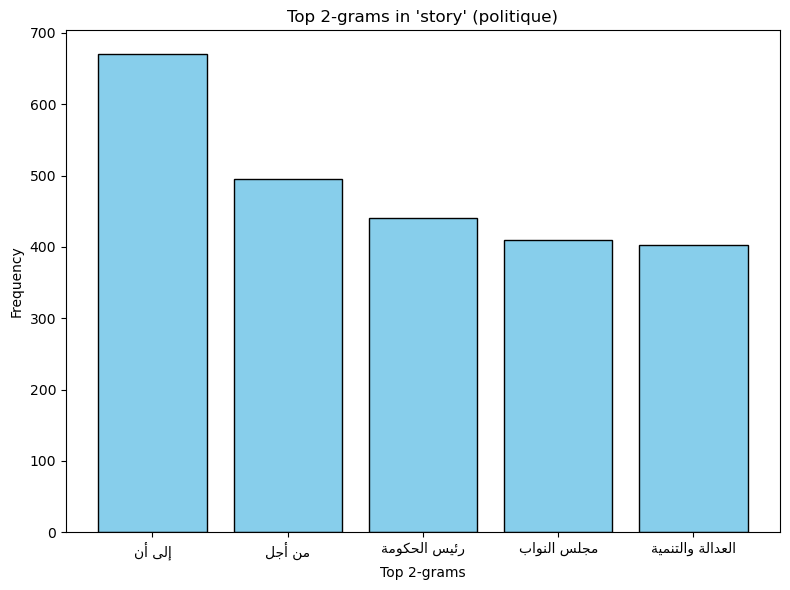

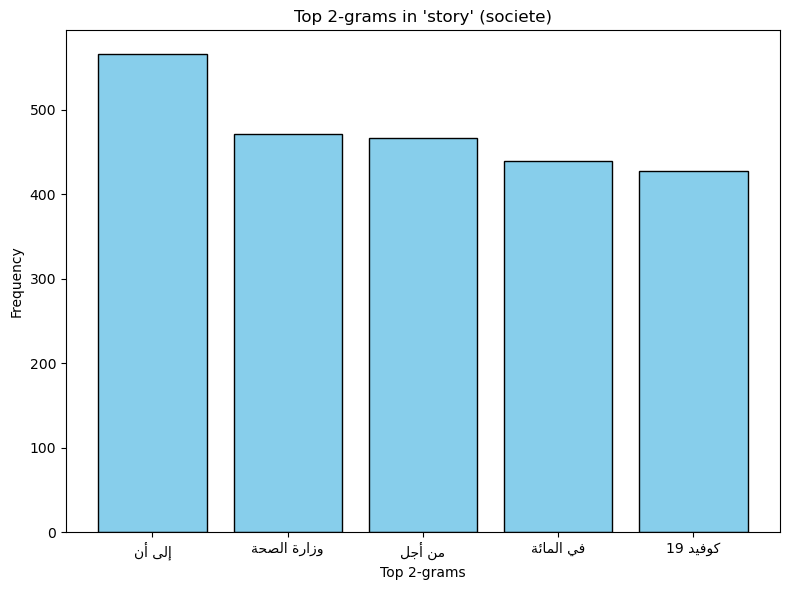

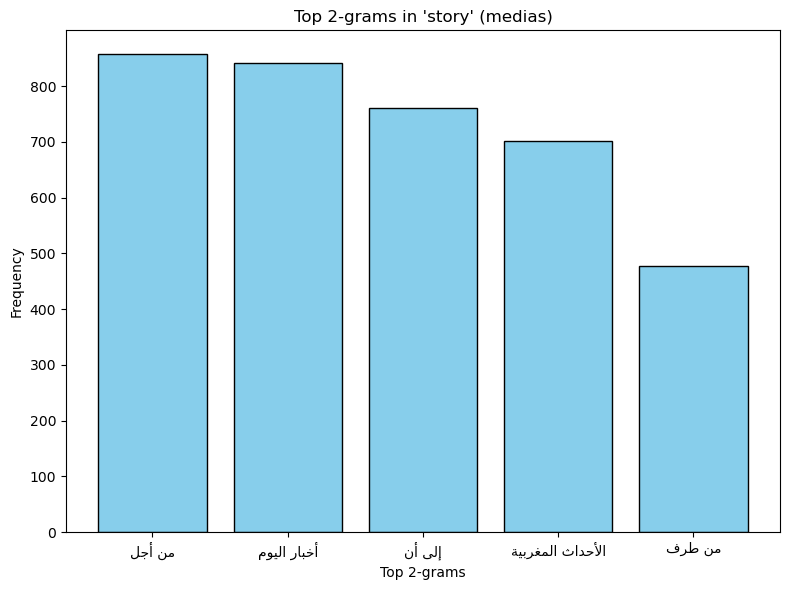

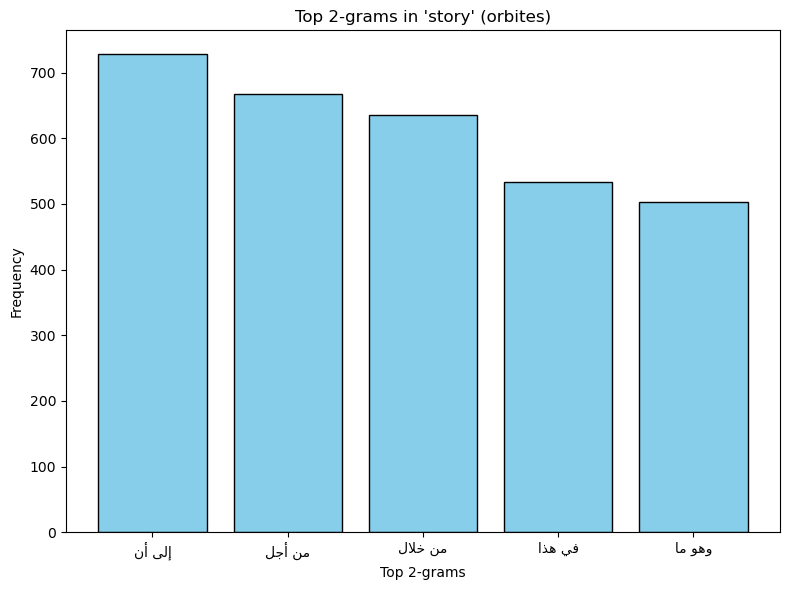

In [94]:
# Visualize the top 2-grams for the classes
for topic in unique_classes:
    
    top_ngram_labels, top_ngram_freqs = zip(*n_class_top_ngrams[topic])

    # Convert Arabic text for right-to-left display
    
    reshaped_labels = [arabic_reshaper.reshape(label) for label in top_ngram_labels]
    display_labels = [get_display(label) for label in reshaped_labels]

    plt.figure(figsize=(8, 6))
    plt.bar(display_labels, top_ngram_freqs, color='skyblue', edgecolor='black')  # Use barh for horizontal bars
    plt.ylabel("Frequency")
    plt.xlabel(f"Top {n}-grams")
    plt.title(f"Top {n}-grams in 'story' ({topic})")
    plt.tight_layout()
    plt.show()
    print("\n\n\n")

## Lengths of Examples in Words and Letters

In [103]:
# Calculate the lengths of examples in words and letters

final_df['word_count'] = final_df['story'].apply(lambda x: len(x.split()))
final_df['letter_count'] = final_df['story'].apply(lambda x: len(x.replace(" ", "")))

final_df

,id,title,date,author,story,topic,word_count,letter_count
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",2020-10-02 23:19:00,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,622,3247
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",2020-10-02 07:26:00,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,381,2084
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",2020-10-02 04:00:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,516,2541
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",2020-10-02 02:00:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,771,4151
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",2020-10-01 19:40:00,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,200,1039
...,...,...,...,...,...,...,...,...
10995,a74f908a055c11eb8ce2646e69d991ea,"تكريم ""تُحفة مَناقب شرفاء وزان"" في جامعة فرنسية",2019-12-24 20:05:00,هسبريس - مصطفى شاكري,أطروحة جديدة تُعنى بدراسة الأبعاد السيميائية ل...,orbites,430,2450
10996,a8579f76055c11eb9627646e69d991ea,"إسبانيا تردّ على المغرب بنشر طائرات ""إف 18"" فو...",2019-12-24 18:00:00,هسبريس - عبد السلام الشامخ,تزامناً مع توجّه المغرب لترسيم حدوده في المياه...,orbites,404,2214
10997,a9362062055c11ebaf97646e69d991ea,"لجنة النموذج التنموي تضع ""ميثاق قواعد الاشتغال""",2019-12-24 13:15:00,هسبريس - و.م.ع,قامت اللجنة الخاصة بالنموذج التنموي، خلال اجتم...,orbites,112,635
10998,aa1cef2e055c11eb8ef8646e69d991ea,ضعف القدرات البشرية والبنيات المؤسساتية يبطئ ا...,2019-12-24 13:00:00,هسبريس - يوسف لخضر,اختُتمت، السبت الماضي بمدينة أكادير، أشغال الم...,orbites,601,3159


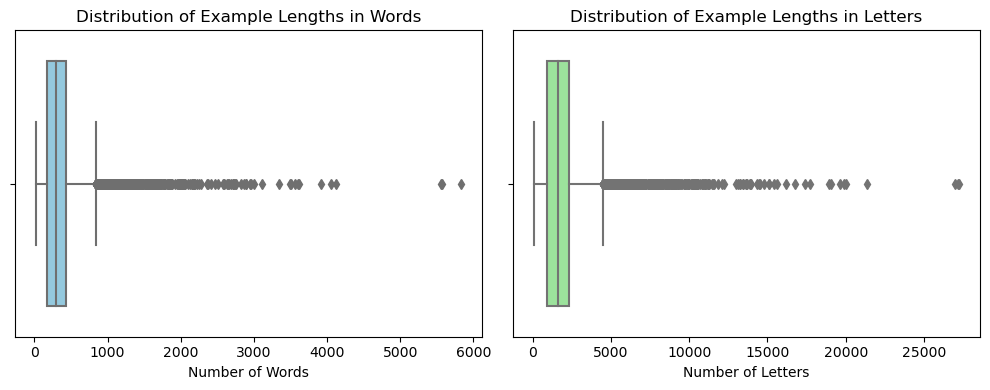

In [99]:
# Visualize the distributions using box plots

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=final_df['word_count'], color='skyblue')
plt.xlabel('Number of Words')
plt.title('Distribution of Example Lengths in Words')

plt.subplot(1, 2, 2)
sns.boxplot(x=final_df['letter_count'], color='lightgreen')
plt.xlabel('Number of Letters')
plt.title('Distribution of Example Lengths in Letters')

plt.tight_layout()
plt.show()

## Most Works Author

C:\Users\Abdalrhman Morsi\AppData\Local\Temp\ipykernel_14636\241596355.py:16: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.tight_layout()
C:\Users\Abdalrhman Morsi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


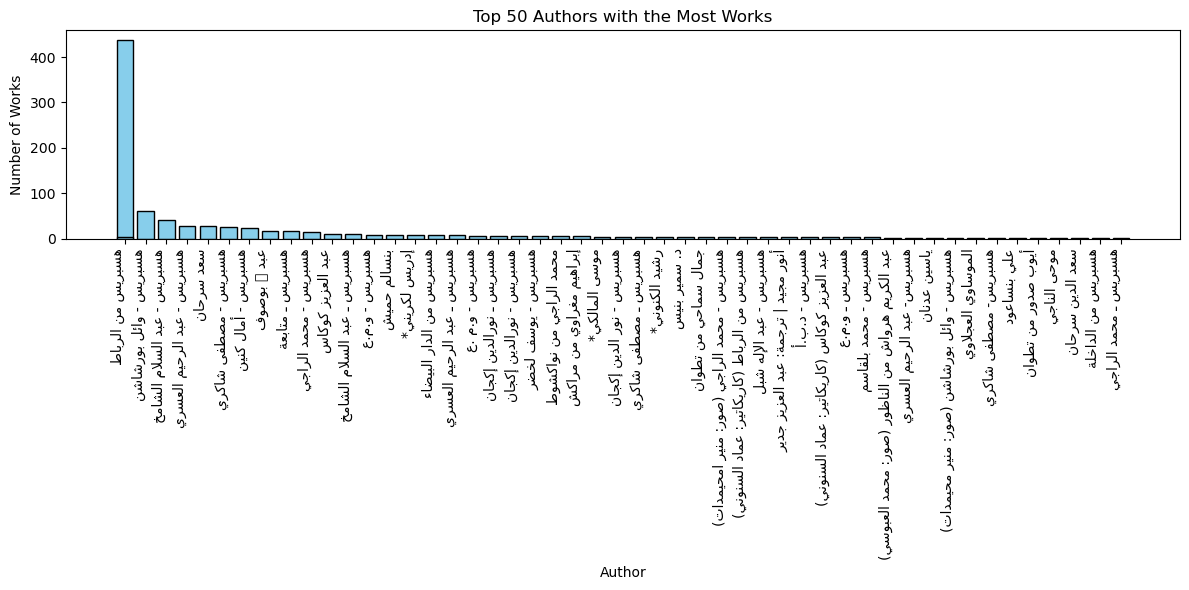

In [114]:
# find the top 50 authors with the most works
author_counts = df['author'].value_counts()
top_50_authors = author_counts.head(50)

# Create a bar plot to compare the top 50 authors

reshaped_author_names = [arabic_reshaper.reshape(name) for name in top_50_authors.index]
display_author_names = [get_display(name) for name in reshaped_author_names]

plt.figure(figsize=(12, 6))
plt.bar(display_author_names, top_50_authors.values, color='skyblue', edgecolor='black')
plt.xlabel('Author')
plt.ylabel('Number of Works')
plt.title('Top 50 Authors with the Most Works')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Dates of Publication

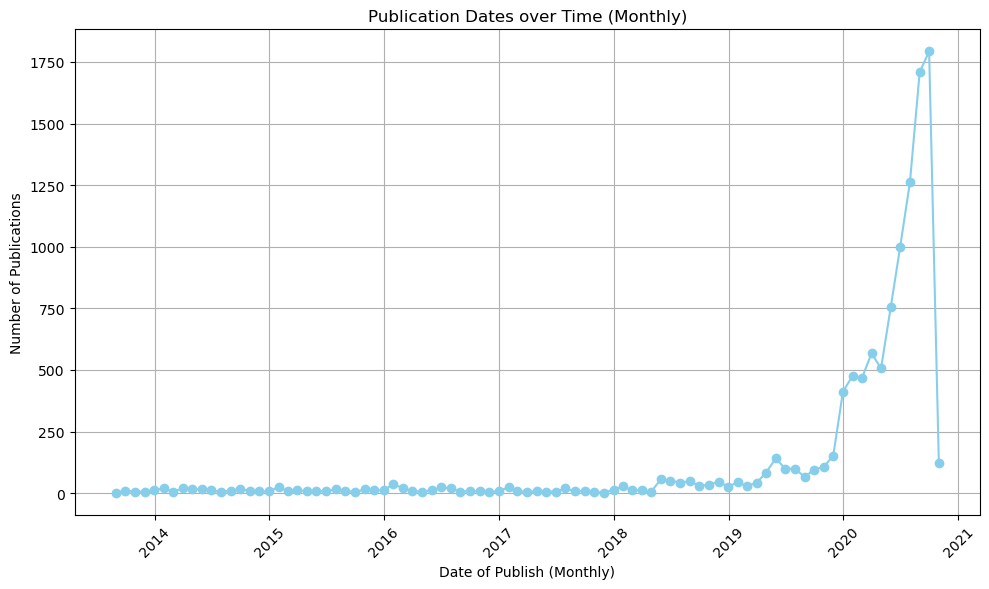

In [117]:
# Sort the data by date

final_df.sort_values(by='date', inplace=True)

# Resample the data by monthly frequency and count the number of publications in each month

df_resampled = final_df.resample('M', on='date').size()

# Create a line plot to compare the dates of publish with monthly frequency

plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled.values, marker='o', color='skyblue')
plt.xlabel('Date of Publish (Monthly)')
plt.ylabel('Number of Publications')
plt.title('Publication Dates over Time (Monthly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()